#Deliverabe 02



Dataset: Walmart

Aluna: Vanessa Mariano da Silva

Importando as bibliotecas

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


import plotly.express as px
import plotly.graph_objects as go



Lendo o arquivo e indicando o index como data

In [74]:
df_wal = pd.read_csv('https://raw.githubusercontent.com/nessamariano/deliverable-02-dnc-dataset-walmart/main/Walmart.csv', parse_dates=['Date'], index_col=['Date'])

Indicando a formatção para exibição dos valores

In [75]:
pd.set_option('display.float_format',  '{:,.2f}'.format)

O arquivo tem 6435 linhas e 7 colunas

In [76]:
df_wal.shape

(6435, 7)

Conhecendo um pouco do dataset

A primeira data é no dia 05/02/2010 e o último registro em 26/10/2012

In [77]:
df_wal.head(1)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,1,"1,643,690.90",0,42.31,2.57,211.10,8.11


In [78]:
df_wal.tail(1)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2012-10-26,45,"760,281.43",0,58.85,3.88,192.31,8.67


Verificando o tipo de variáveis e dados nulos

In [79]:
df_wal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-05-02 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


Não temos dados nulos no dataset, mas precisamos tratar a variável 'Temperature', que está em Fahreneit. Vamos transformá-la em Celsius.

In [80]:
df_wal['Temperature'] = df_wal['Temperature'].apply(lambda x: x -32  / 1.8).round(2)
df_wal.head(1)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,1,"1,643,690.90",0,24.53,2.57,211.10,8.11


Verificando a quantidade de lojas

In [81]:
df_wal['Store'].nunique() 

45

Para ajudar em análises futuras, vamos criar algumas colunas e dataframes específicos.

Primeiro vamos iniciar criando as colunas de semana, mês e ano, para analisarmos em quais períodos temos a maior quantidade de vendas.

In [82]:
df_wal['week'] = df_wal.index.weekofyear
df_wal['month'] = df_wal.index.month
df_wal['year'] = df_wal.index.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


Agora vamos criar a coluna de média de vendas semanais e venda acumulada, que nos servirá de base para analisarmos as melhores performances.

In [83]:
df_wal['media_weelky_store'] = df_wal.groupby('Store')['Weekly_Sales'].transform('mean')

df_wal['sales_acum']=df_wal.groupby('Store')['Weekly_Sales'].transform('sum')

Criaremos a coluna de média de vendas semanais do ano corrente para usarmos na construção da coluna de 'growth', que avalia o crescimento médio no ano corrente das lojas em relação ao todo período que temos no dataset.

Esse é o principal KPI que usaremos para avaliarmos quais lojas estão outperformando perante as demais.

In [84]:
df_wal['mean_1year'] = df_wal.groupby('Store')['Weekly_Sales'].rolling('365D').mean().reset_index(0,drop=True)

df_wal['growth'] = df_wal['mean_1year'] / df_wal['media_weelky_store']


E para completar, criaremos as colunas com os valores máximos e mínimos já realizados por cada loja.

Isso nos indicará o maior valor já faturado por uma loja em todo período.



In [85]:
df_wal['max_sales'] = df_wal.groupby('Store')['Weekly_Sales'].transform('max') 

df_wal['min_sales'] = df_wal.groupby('Store')['Weekly_Sales'].transform('min') 


Conferindo o dataset com os KPI´s criados

In [86]:
df_wal.head(1)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year,media_weelky_store,sales_acum,mean_1year,growth,max_sales,min_sales
Date,,,,,,,,,,,,,,,,
2010-05-02,1,"1,643,690.90",0,24.53,2.57,211.10,8.11,17,5,2010,"1,555,264.40","222,402,808.85","1,643,690.90",1.06,"2,387,950.20","1,316,899.31"


Criando os datasets específicos que usaremos nas análises

Dataframes com os dados por ano

In [87]:
df_wal_2010 = df_wal.loc[(df_wal['year'] == 2010)]
df_wal_2011 = df_wal.loc[(df_wal['year'] == 2011)]
df_wal_2012 = df_wal.loc[(df_wal['year'] == 2012)]

Dataframes específicos com indicadores por ano e ordenados do maior para o menor

In [88]:
df_store10 = df_wal_2010.groupby('Store')['Weekly_Sales'].agg(['min', 'max', 'sum', 'mean']).sort_values(by='sum', ascending=False).round(2)
df_store11 = df_wal_2011.groupby('Store')['Weekly_Sales'].agg(['min', 'max', 'sum', 'mean']).sort_values(by='sum', ascending=False).round(2)
df_store12 = df_wal_2012.groupby('Store')['Weekly_Sales'].agg(['min', 'max', 'sum', 'mean']).sort_values(by='sum', ascending=False).round(2)

df_store_all = df_wal.groupby('Store')['Weekly_Sales'].agg(['min', 'max', 'sum', 'mean']).sort_values(by='sum', ascending=False).round(2)



Dataframes com indicadores por semana, mês e ano, além da média geral.

In [115]:
df_year = df_wal.groupby('year')['Weekly_Sales'].agg(['min', 'max', 'sum', 'mean']).sort_values(by='sum', ascending=False).round(2)
df_month = df_wal.groupby('month')['Weekly_Sales'].agg(['min', 'max', 'sum', 'mean']).sort_values(by='sum', ascending=False).round(2)
df_week = df_wal.groupby('week').agg({'Weekly_Sales':['min', 'max', 'sum', 'mean'], 'Holiday_Flag': ['sum']}).sort_values(by=('Weekly_Sales', 'sum'), ascending=False).round(2)

df_media = df_wal.groupby('Store').agg({'Weekly_Sales':['mean', 'sum'],'sales_acum':['mean', 'sum'],'Unemployment':['mean'], 'Temperature':['mean'], 'CPI':['mean'], 'Fuel_Price':['mean']})

df_financial = df_wal.groupby('Store').agg({'sales_acum':['sum'],'media_weelky_store':['mean'], 'mean_1year':['mean'], 'growth':['max'], 'max_sales':['max'],'min_sales':['min'] })

In [91]:
df_holiday = df_wal.groupby(['Store','Holiday_Flag']).agg({'Weekly_Sales':['mean','max','sum']})
df_holiday = df_holiday.reset_index()

Descobrindo as semanas que mais temos vendas.

As semanas 41, 37, 28, 15,19 foram as semanas que mais venderam (somatório de vendas de todo período).

No dataset as semanas com feriados são indicadas na coluna Holiday_Flag. Essa coluna é uma variável categórica, onde o número 0 indica que não temos feriado e o número 1 indica que temos feriado.

O código foi contruido para somar e apresentar o número 45, quando temos feriado nessa semana.

Como podem perceber, tivemos apenas a semana 28 com feriado. Essa semana não corresponde a nenhum feriado nacional, podemos considerar um erro no dataset.

Entretanto, o maior insight que tivemos é que os maiores somatórios de vendas semanais ocorrem em semanas que não são feriados. Isso nos guiará para frente.



In [92]:
df_week.head()

Weekly_Sales                                          Holiday_Flag
              min          max            sum         mean          sum
week                                                                   
41     251,732.92 2,752,122.08 190,594,515.18 1,058,858.42            0
37     246,277.18 2,546,123.78 186,661,872.94 1,037,010.41            0
28     265,003.47 2,165,796.31 186,189,620.91 1,034,386.78           45
15     236,157.12 2,284,106.60 185,441,800.93 1,030,232.23            0
19     246,124.61 2,246,411.89 184,124,846.22 1,022,915.81            0

Os meses com maiores vendas semanais acumuladas são os meses de abril, maio, outubro, dezembro e setembro.

O mês de abril corresponde ao mês de festividades da semana de Independência americano.

O mês de maio marca o início do verão.

Já os meses de setembro, outubro e dezembro correspondem ao final do ano

In [93]:
df_month.head()

,min,max,sum,mean
month,,,,
4,"234,218.03","2,363,601.47","645,323,889.62","1,024,323.63"
5,"239,206.26","2,623,469.95","605,696,592.19","1,035,378.79"
10,"213,538.32","2,752,122.08","602,918,857.42","1,030,630.53"
12,"215,359.21","3,818,686.45","599,076,091.17","1,210,254.73"
7,"224,806.96","2,370,116.52","593,313,937.18","1,014,211.86"


As vendas totais no ano está subindo ano a ano, indicando crescimento da rede.

Como no ano de 2012 não temos todo mês de outubro, novembro e dezembro, se a rede repetir o mesmo faturamento nesses meses dos anos passados, conseguirá ultrapassar o faturamento anual do ano de 2011.



In [94]:
df_year.head()

,min,max,sum,mean
year,,,,
2011,"215,359.21","3,676,388.98","2,448,200,007.35","1,046,239.32"
2010,"209,986.25","3,818,686.45","2,288,886,120.41","1,059,669.50"
2012,"236,920.49","2,565,259.92","2,000,132,859.35","1,033,660.39"


Agora analisaremos as lojas que melhor perfomaram em relação as vendas semanais.

No ano de 2010 tivemos destaque para as lojas, 14, 20, 4, 2, e 13.

In [95]:
df_store10.head(5) # Ano de 2010

,min,max,sum,mean
Store,,,,
14,"1,623,716.46","3,818,686.45","105,462,242.38","2,197,130.05"
20,"1,789,687.65","3,766,687.43","101,733,080.72","2,119,439.18"
4,"1,762,539.30","3,526,713.39","95,680,470.81","1,993,343.14"
2,"1,724,557.22","3,436,007.68","95,277,864.19","1,984,955.50"
13,"1,675,292.00","3,595,903.20","95,272,735.45","1,984,848.66"


No ano de 2011 tivemos destaque para as lojas 4, 20, 14, 13  e 10.

In [96]:
df_store11.head(5) # Ano de 2011

,min,max,sum,mean
Store,,,,
4,"1,814,240.85","3,676,388.98","111,092,293.33","2,136,390.26"
20,"1,761,506.68","3,555,371.03","109,837,002.36","2,112,250.05"
14,"1,613,718.38","3,369,068.99","106,096,270.70","2,040,312.90"
13,"1,633,663.12","3,556,766.03","104,537,513.33","2,010,336.79"
10,"1,627,707.31","3,487,986.89","98,916,894.74","1,902,247.98"


No acumulado de 2012 temos as lojas 4,20,13,  2 e 10.

In [97]:
df_store12.head(5) # Ano de 2012

,min,max,sum,mean
Store,,,,
4,"1,928,720.51","2,470,206.13","92,771,189.24","2,157,469.52"
20,"1,761,016.51","2,565,259.92","89,827,709.38","2,089,016.50"
13,"1,733,983.09","2,271,614.76","86,707,455.02","2,016,452.44"
2,"1,660,906.14","2,196,688.46","81,496,695.37","1,895,271.99"
10,"1,632,406.00","2,218,595.80","78,228,616.94","1,819,270.16"


Já em todo período de vendas temos as lojas 20,4,14,13 e 2.

Sendo a loja 20 a campeã em venda.

In [98]:
df_store_all.head(5)

,min,max,sum,mean
Store,,,,
20,"1,761,016.51","3,766,687.43","301,397,792.46","2,107,676.87"
4,"1,762,539.30","3,676,388.98","299,543,953.38","2,094,712.96"
14,"1,479,514.66","3,818,686.45","288,999,911.34","2,020,978.40"
13,"1,633,663.12","3,595,903.20","286,517,703.80","2,003,620.31"
2,"1,650,394.44","3,436,007.68","275,382,440.98","1,925,751.34"


Visualiazação das vendas totais por loja ressaltando as lojas 20,4,14,13 e 2.

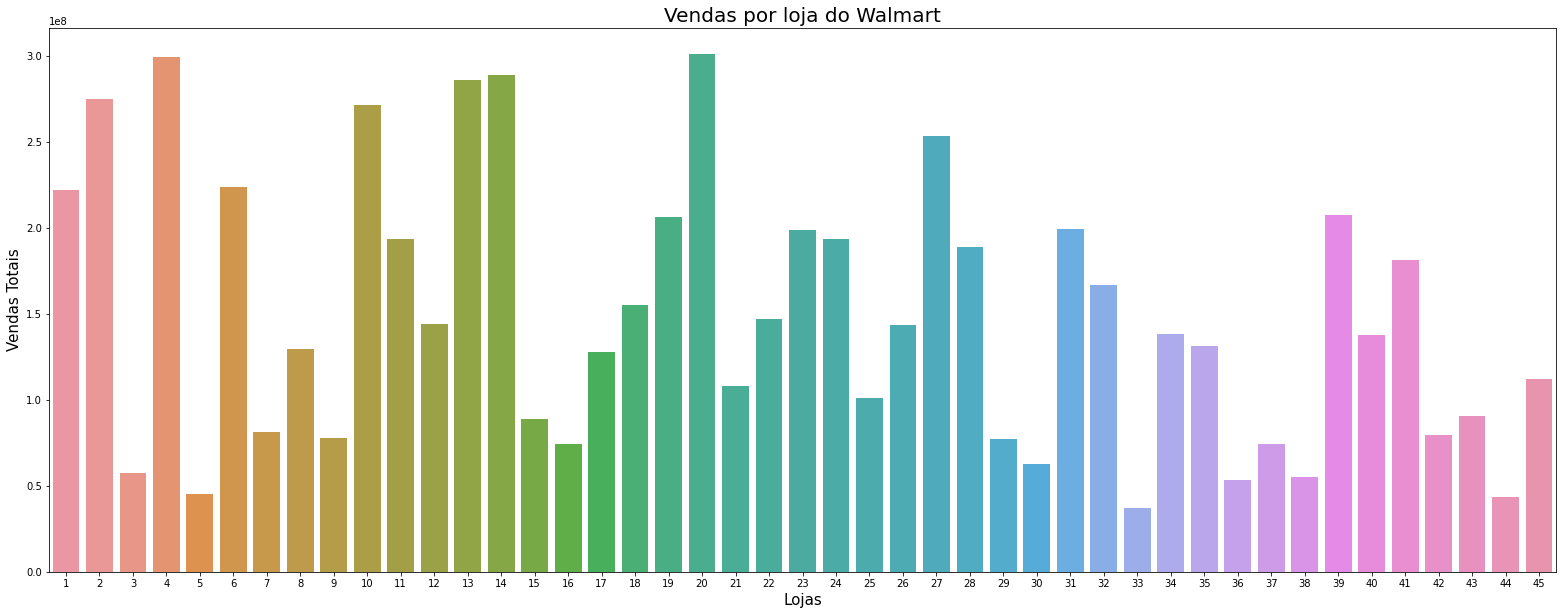

In [99]:
plt.figure(figsize=(27,10))
fig = sns.barplot(x=df_store_all.index, y='sum', data=df_store_all)
plt.title('Vendas por loja do Walmart', fontsize=20 )
plt.ylabel("Vendas Totais", fontsize= 15)
plt.xlabel("Lojas",fontsize=15)
plt.show()

Visualização das vendas semanais por loja, com mínimos, máximas e médias.

Podemos ver que temos diferentes tipos de lojas com  faturamentos distintos.

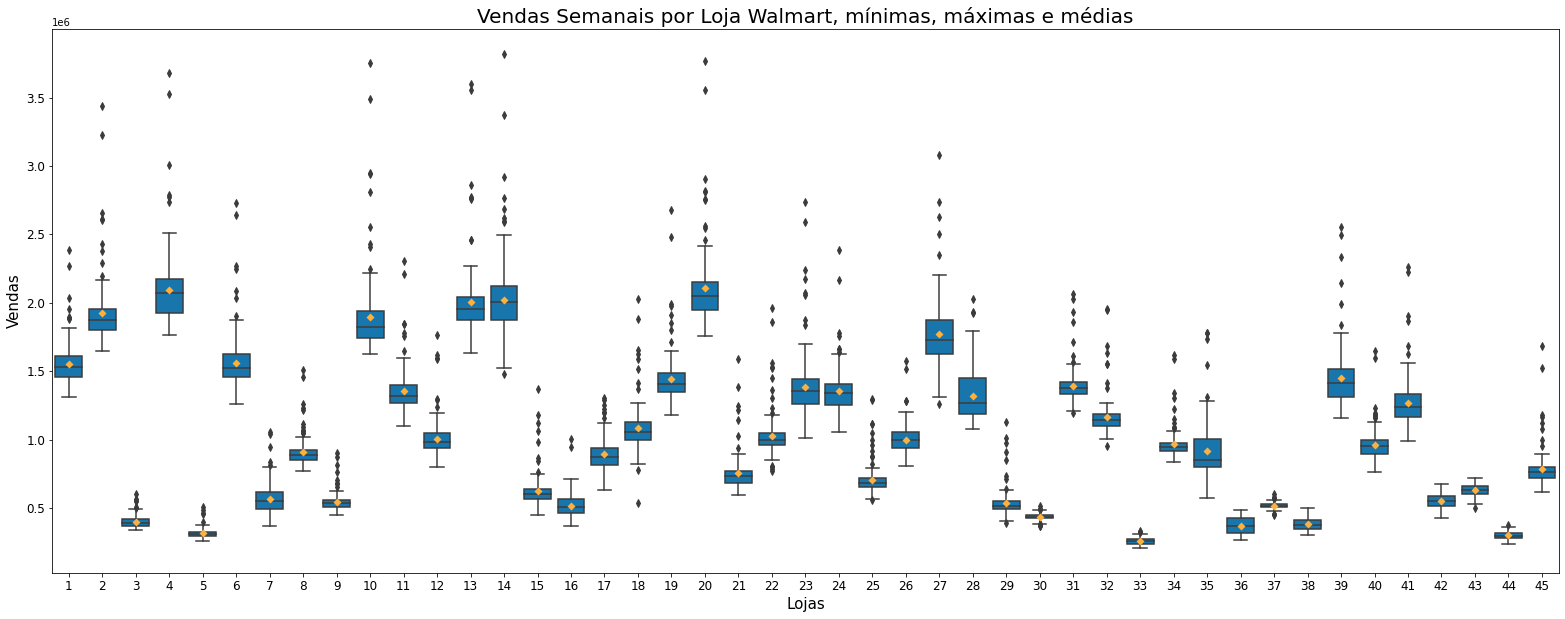

In [100]:
plt.figure(figsize=(27, 10))
sns.boxplot(x="Store", 
            y="Weekly_Sales", 
            data=df_wal,
            color="#007DC6", 
            showmeans=True, 
            meanprops={"marker": "D", 
                       "markeredgecolor": "none",
                       "markerfacecolor":"#FCB040", 
                       "markersize": "6"} )
plt.title("Vendas Semanais por Loja Walmart, mínimas, máximas e médias",fontsize=20)
plt.ylabel("Vendas", fontsize= 15)
plt.xlabel("Lojas",fontsize=15)
plt.tick_params(labelsize=12)
plt.show()

Comparando com os feriados

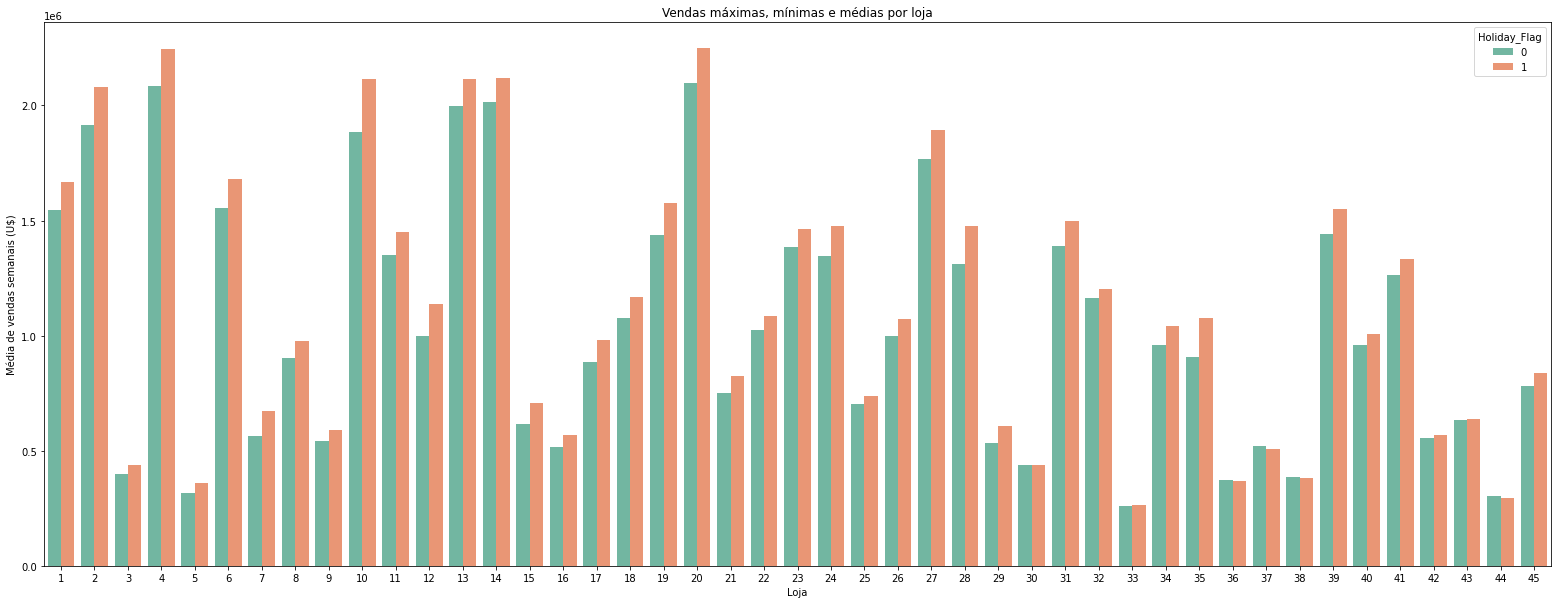

In [101]:
plt.figure(figsize=(27,10))

sns.barplot(x = 'Store',y = ('Weekly_Sales',  'mean'),hue= 'Holiday_Flag',data=df_holiday, palette="Set2" )
plt.xlabel("Loja")
plt.ylabel("Média de vendas semanais (U$)")
plt.title("Vendas máximas, mínimas e médias por loja")
plt.show()

Agora vamos analisar a campeão de vendas, a loja 20.

Para isso vamos criar um dataframe específico dessa loja.

In [102]:
big_sale = df_wal.loc[(df_wal['Store'] == 20 )]


Vamos compará-la com a média de faturamento semanal de todas as lojas e com a sua própria média de faturamento, para identificarmos as semanas que a loja mais performou.

Para isso primeiro vamos precisar identificar a média de vendas semanais de todas as lojas.

Essa informação é extraída via a função describe

In [103]:
df_wal.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year,media_weelky_store,sales_acum,mean_1year,growth,max_sales,min_sales
count,"6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00"
mean,23.00,"1,046,964.88",0.07,42.88,3.36,171.58,8.00,26.00,6.48,"2,010.97","1,046,964.88","149,715,977.49","1,047,504.50",1.00,"1,817,510.12","826,830.02"
std,12.99,"564,366.62",0.26,18.44,0.46,39.36,1.88,14.51,3.32,0.80,"540,560.52","77,300,155.02","545,380.43",0.05,"1,019,691.29","450,363.75"
min,1.00,"209,986.25",0.00,-19.84,2.47,126.06,3.88,1.00,1.00,"2,010.00","259,861.69","37,160,221.96","246,998.34",0.82,"331,173.51","209,986.25"
25%,12.00,"553,350.10",0.00,29.68,2.93,131.74,6.89,14.00,4.00,"2,010.00","556,403.86","79,565,752.43","543,322.04",0.98,"1,004,730.69","451,327.61"
50%,23.00,"960,746.04",0.00,44.89,3.44,182.62,7.87,26.00,6.00,"2,011.00","966,781.56","138,249,763.00","982,177.40",1.00,"1,682,862.03","772,539.12"
75%,34.00,"1,420,158.66",0.00,57.16,3.73,212.74,8.62,38.00,9.00,"2,012.00","1,395,901.44","199,613,905.50","1,412,321.05",1.02,"2,387,950.20","1,158,698.44"
max,45.00,"3,818,686.45",1.00,82.36,4.47,227.23,14.31,52.00,12.00,"2,012.00","2,107,676.87","301,397,792.46","2,623,469.95",1.34,"3,818,686.45","1,762,539.30"


A média de vendas semanais de todo dataset é de U$ 1,046,964.88

Utilizaremos essa informação abaixo.

In [104]:
big_sale0 = big_sale[(big_sale['Weekly_Sales']) > 1046964.88 ].sort_values(by= 'Weekly_Sales', ascending = True).round(2)
big_sale0.shape

(143, 16)

Observa-se que a loja 20 ultrapassou a média em todas as semana, com e sem feriado.

Agora vamos comparar com a sua própria média.

Temos 52 semanas que a mesma ultrapassou a sua própria média de venda semanal.


In [105]:
big_sale1 = big_sale.loc[(big_sale['Weekly_Sales'] > big_sale['media_weelky_store']  )]
big_sale1.shape


(52, 16)

Sendo 47 dessas semanas são semanas normais, sem feriados, ou seja, a loja 20 vende consistentemente o ano todo.

In [106]:
big_sale2 = big_sale.loc[((big_sale['Weekly_Sales'] > big_sale['media_weelky_store']) & (big_sale['Holiday_Flag'] == 0))]
big_sale2.shape

(47, 16)

Sendo os maiores faturamentos semanais nas semanas de Natal, semana 51.

In [107]:
big_sale1.sort_values(by='Weekly_Sales', ascending=False).head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year,media_weelky_store,sales_acum,mean_1year,growth,max_sales,min_sales
Date,,,,,,,,,,,,,,,,
2010-12-24,20,"3,766,687.43",0,7.39,3.14,204.64,7.48,51,12,2010,"2,107,676.87","301,397,792.46","2,126,241.34",1.01,"3,766,687.43","1,761,016.51"
2011-12-23,20,"3,555,371.03",0,22.41,3.39,212.24,7.08,51,12,2011,"2,107,676.87","301,397,792.46","2,138,871.37",1.01,"3,766,687.43","1,761,016.51"
2011-11-25,20,"2,906,233.25",1,28.60,3.49,211.41,7.08,47,11,2011,"2,107,676.87","301,397,792.46","2,132,525.80",1.01,"3,766,687.43","1,761,016.51"
2010-12-17,20,"2,819,193.17",0,6.29,3.14,204.63,7.48,50,12,2010,"2,107,676.87","301,397,792.46","2,090,579.47",0.99,"3,766,687.43","1,761,016.51"
2010-11-26,20,"2,811,634.04",1,28.88,3.04,204.96,7.48,47,11,2010,"2,107,676.87","301,397,792.46","2,050,681.14",0.97,"3,766,687.43","1,761,016.51"


Visualizando o faturamento semanal da loja 20 ao longo do ano.

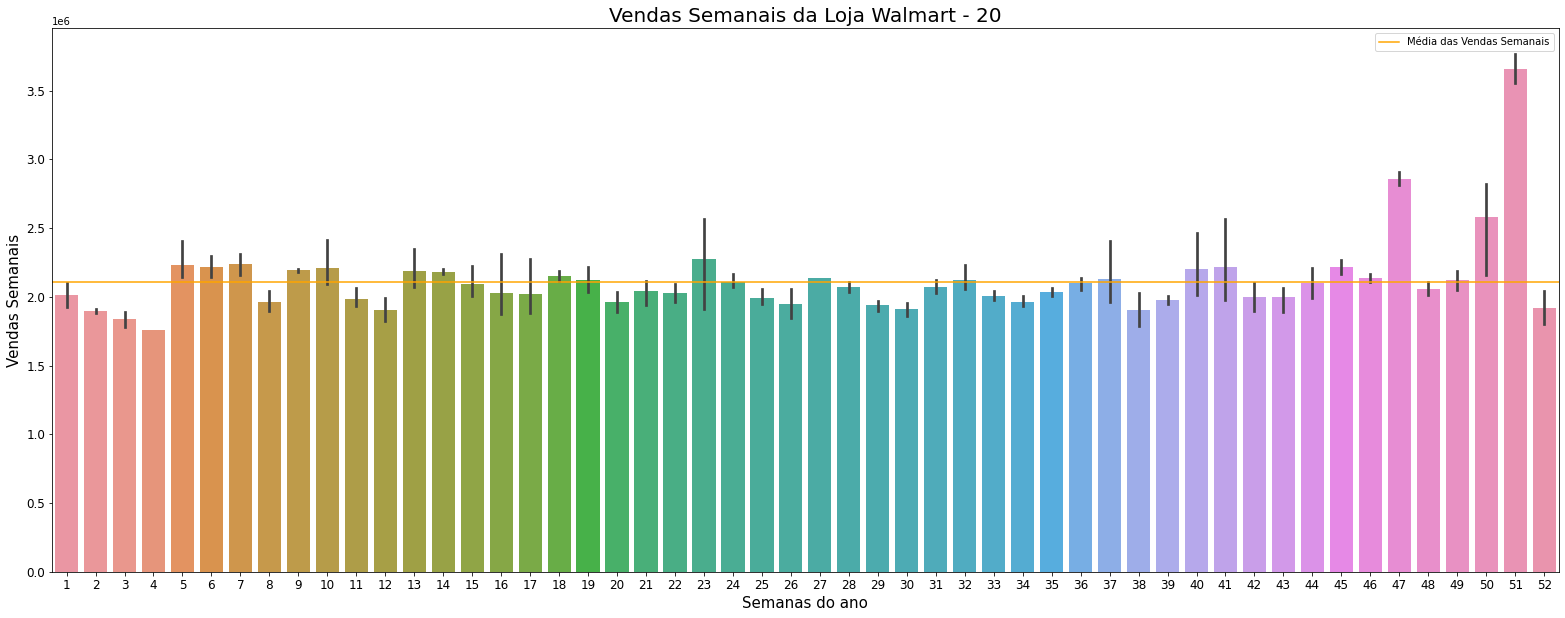

In [108]:
plt.figure(figsize=(27,10))

fig = sns.barplot(x='week', y='Weekly_Sales', data=big_sale)
plt.axhline(big_sale['Weekly_Sales'].mean(), color='orange', label='Média das Vendas Semanais')

plt.title("Vendas Semanais da Loja Walmart - 20",fontsize=20)
plt.ylabel("Vendas Semanais", fontsize= 15)
plt.xlabel("Semanas do ano",fontsize=15)
plt.tick_params(labelsize=12)
plt.legend()
plt.show()


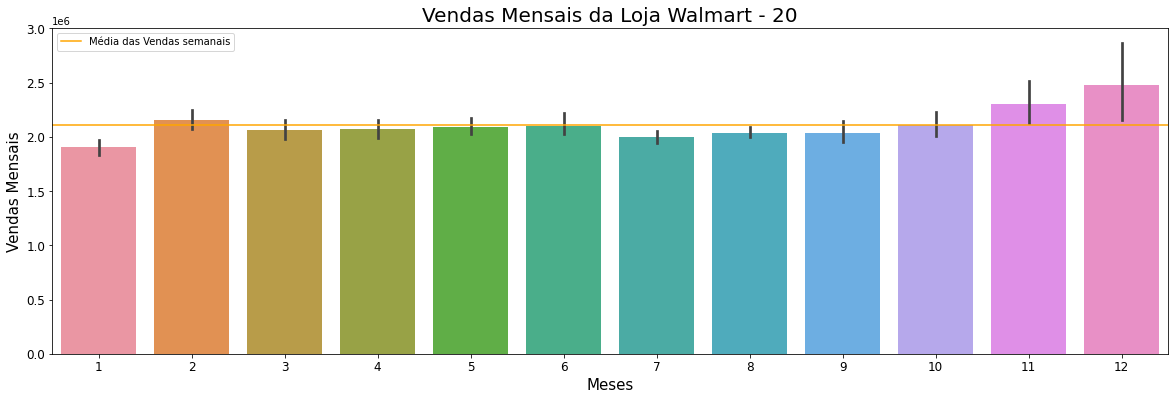

In [109]:
plt.figure(figsize=(20,6))

fig = sns.barplot(x='month', y='Weekly_Sales', data=big_sale)
plt.axhline(big_sale['Weekly_Sales'].mean(), color='orange', label='Média das Vendas semanais')

plt.title("Vendas Mensais da Loja Walmart - 20",fontsize=20)
plt.ylabel("Vendas Mensais", fontsize= 15)
plt.xlabel("Meses",fontsize=15)
plt.tick_params(labelsize=12)
plt.legend()
plt.show()


Para investigarmos qual a melhor loja para expansão, vamos analisar a correlação das vendas semanais com as demais variáveis e assim ver o que pode estar influenciando nas vendas.

Vamos repetir a função describe para melhor visualização.

In [110]:
df_wal.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year,media_weelky_store,sales_acum,mean_1year,growth,max_sales,min_sales
count,"6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00"
mean,23.00,"1,046,964.88",0.07,42.88,3.36,171.58,8.00,26.00,6.48,"2,010.97","1,046,964.88","149,715,977.49","1,047,504.50",1.00,"1,817,510.12","826,830.02"
std,12.99,"564,366.62",0.26,18.44,0.46,39.36,1.88,14.51,3.32,0.80,"540,560.52","77,300,155.02","545,380.43",0.05,"1,019,691.29","450,363.75"
min,1.00,"209,986.25",0.00,-19.84,2.47,126.06,3.88,1.00,1.00,"2,010.00","259,861.69","37,160,221.96","246,998.34",0.82,"331,173.51","209,986.25"
25%,12.00,"553,350.10",0.00,29.68,2.93,131.74,6.89,14.00,4.00,"2,010.00","556,403.86","79,565,752.43","543,322.04",0.98,"1,004,730.69","451,327.61"
50%,23.00,"960,746.04",0.00,44.89,3.44,182.62,7.87,26.00,6.00,"2,011.00","966,781.56","138,249,763.00","982,177.40",1.00,"1,682,862.03","772,539.12"
75%,34.00,"1,420,158.66",0.00,57.16,3.73,212.74,8.62,38.00,9.00,"2,012.00","1,395,901.44","199,613,905.50","1,412,321.05",1.02,"2,387,950.20","1,158,698.44"
max,45.00,"3,818,686.45",1.00,82.36,4.47,227.23,14.31,52.00,12.00,"2,012.00","2,107,676.87","301,397,792.46","2,623,469.95",1.34,"3,818,686.45","1,762,539.30"


Será que temperatura, preço da gasolina, inflação e desemprego estão influenciando nas vendas semanais das lojas?

Ressaltamos que os dados conferem ao ano de 2010 até outubro de 2012.

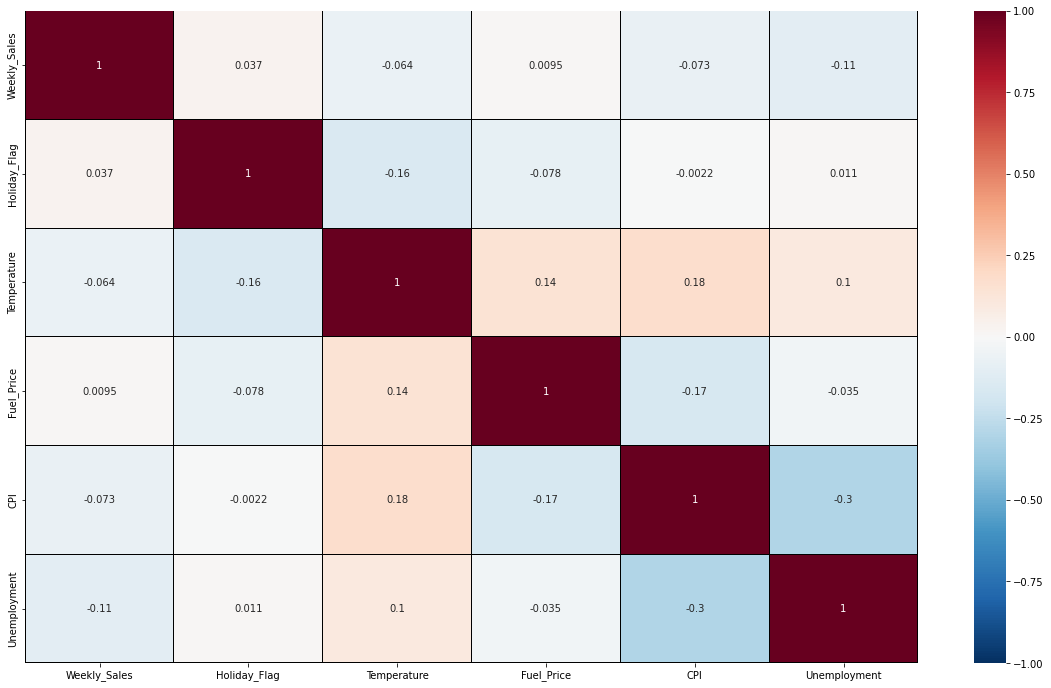

In [111]:
cols = df_wal[[ 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
                         'CPI', 'Unemployment']]
corr = cols.corr()

plt.figure(figsize=[20, 12])
sns.heatmap(data=most_corr_var, vmin=-1, vmax=1, linewidth=0.01, linecolor='black', cmap='RdBu_r', annot=True)

plt.show()

As correlações são muito fracas e não indicam nenhum relação entre as mesmas.

Vamos encontrar outra forma de melhor avaliar cada loja.
Apenas para visualização, temos abaixo as médias de cada variável em relação ás campeãs de vendas.

Podemos perceber que a loja 20 tem uma média de temperatura de 13°C e o preço médio da gasolina é de U$3,42/galão.

Já a loja 38, que tem a menor média de vendas semanais, tem uma média de temperatura negativa

In [112]:
df_media.sort_values(('Weekly_Sales', 'mean'), ascending=False).head()

Weekly_Sales                    sales_acum                    \
              mean            sum           mean               sum   
Store                                                                
20    2,107,676.87 301,397,792.46 301,397,792.46 43,099,884,321.78   
4     2,094,712.96 299,543,953.38 299,543,953.38 42,834,785,333.34   
14    2,020,978.40 288,999,911.34 288,999,911.34 41,326,987,321.62   
13    2,003,620.31 286,517,703.80 286,517,703.80 40,972,031,643.40   
2     1,925,751.34 275,382,440.98 275,382,440.98 39,379,689,060.14   

      Unemployment Temperature    CPI Fuel_Price  
              mean        mean   mean       mean  
Store                                             
20            7.37       37.67 209.04       3.42  
4             5.96       44.47 128.68       3.22  
14            8.65       40.01 186.29       3.42  
13            7.00       35.92 128.68       3.29  
2             7.62       50.44 215.65       3.22

In [113]:
df_media.sort_values(('Weekly_Sales', 'mean'), ascending=False).tail()

Weekly_Sales                  sales_acum                  Unemployment  \
              mean           sum          mean              sum         mean   
Store                                                                          
38      385,731.65 55,159,626.42 55,159,626.42 7,887,826,578.06        13.12   
36      373,511.99 53,412,214.97 53,412,214.97 7,637,946,740.71         7.87   
5       318,011.81 45,475,688.90 45,475,688.90 6,503,023,512.70         6.30   
44      302,748.87 43,293,087.84 43,293,087.84 6,190,911,561.12         6.74   
33      259,861.69 37,160,221.96 37,160,221.96 5,313,911,740.28         8.53   

      Temperature    CPI Fuel_Price  
             mean   mean       mean  
Store                                
38          52.48 128.68       3.61  
36          53.38 214.73       3.20  
5           51.63 216.57       3.22  
44          35.92 128.68       3.29  
33          58.95 128.68       3.58

Criamos no início a coluna 'growth', 'media1year', e 'mean_weekly_sales' e o dataframe df_financial.

Vamos utilizar essas métricas para encontrarmos as lojas que estão crescendo ano a ano = 'Growth'

o KPI 'Growth' foi feito a partir da divisão da coluna 'media1year' pela 'mean_weekly_sales'.

A coluna 'media1year' é a média das vendas semanais do ultimo ano do dataset (out de 2011 a out de 2012) = 365D.

A coluna 'mean_weekly_sales' é média de vendas semanais de todo período de cada loja.

Se a media do ultimo ano for maior que a média semanal de todo período, temos aí uma loja crescendo, logo valores acima de 1 são indicativos.

Abaixo as 15 lojas com maiores 



In [118]:
df_financial.sort_values(by=('growth','max'), ascending=False).head(15)

,sales_acum,media_weelky_store,mean_1year,growth,max_sales,min_sales
,sum,mean,mean,max,max,min
Store,,,,,,
35,"18,807,456,107.44","919,724.98","981,498.57",1.34,"1,781,866.98","576,332.05"
14,"41,326,987,321.62","2,020,978.40","2,096,831.92",1.30,"3,818,686.45","1,479,514.66"
28,"27,064,706,322.94","1,323,522.24","1,355,116.12",1.26,"2,026,026.39","1,079,669.11"
36,"7,637,946,740.71","373,511.99","402,389.86",1.26,"489,372.02","270,677.98"
10,"38,841,333,086.27","1,899,424.57","1,936,192.39",1.15,"3,749,057.69","1,627,707.31"
3,"8,234,903,115.01","402,704.44","399,352.88",1.15,"605,990.41","339,597.38"
11,"27,736,678,512.40","1,356,383.12","1,366,833.05",1.14,"2,306,265.36","1,100,418.69"
20,"43,099,884,321.78","2,107,676.87","2,105,072.51",1.14,"3,766,687.43","1,761,016.51"


A partir dessa informação temos que no TOP 3 as lojas 35, 14 e 28.

Nós ja visualizamos a loja 14 na análise de campeã de vendas em 2010, sendo que perdeu o posto nos anos seguintes.

A mesma aparecendo no TOP 3 de Growth, significa que já está sendo feito um trabalho interno para voltar ao top das campeãs de vendas.






In [119]:
df_store10.head(1)

,min,max,sum,mean
Store,,,,
14,"1,623,716.46","3,818,686.45","105,462,242.38","2,197,130.05"


In [120]:
df_store11.head(1)

,min,max,sum,mean
Store,,,,
4,"1,814,240.85","3,676,388.98","111,092,293.33","2,136,390.26"


In [121]:
df_store12.head(1)

,min,max,sum,mean
Store,,,,
4,"1,928,720.51","2,470,206.13","92,771,189.24","2,157,469.52"


Para melhor embasar nossa decisão, vamos criar a coluna 'max/min', que é a divisão do máximo de vendas semanal pela mínima de vendas semanal.

Essa coluna nos indicará quantas vezes o faturamento máximo foi acima do mínimo e nos ajudará a identificar quem tem potencial de crescimento.


In [129]:
df_financial['max/min'] = df_financial['max_sales', 'max'] / df_financial['min_sales', 'min'] 

A loja 35 apresenta a maior relação, mas seu faturamento acumulado é menos da metade da loja 14.

A loja 28 é intermediária entre as duas e apresenta a menor relação de max/min.


In [131]:
df_financial.sort_values(by=('growth','max'), ascending=False).head(15)

,sales_acum,media_weelky_store,mean_1year,growth,max_sales,min_sales,max/min
,sum,mean,mean,max,max,min,
Store,,,,,,,
35,"18,807,456,107.44","919,724.98","981,498.57",1.34,"1,781,866.98","576,332.05",3.09
14,"41,326,987,321.62","2,020,978.40","2,096,831.92",1.30,"3,818,686.45","1,479,514.66",2.58
28,"27,064,706,322.94","1,323,522.24","1,355,116.12",1.26,"2,026,026.39","1,079,669.11",1.88
36,"7,637,946,740.71","373,511.99","402,389.86",1.26,"489,372.02","270,677.98",1.81
10,"38,841,333,086.27","1,899,424.57","1,936,192.39",1.15,"3,749,057.69","1,627,707.31",2.30
3,"8,234,903,115.01","402,704.44","399,352.88",1.15,"605,990.41","339,597.38",1.78
11,"27,736,678,512.40","1,356,383.12","1,366,833.05",1.14,"2,306,265.36","1,100,418.69",2.10
20,"43,099,884,321.78","2,107,676.87","2,105,072.51",1.14,"3,766,687.43","1,761,016.51",2.14


Sendo assim, o investimento na loja 14 tem potencial de crescimento, podendo levá-la novamente a ser campeã de vendas e lojas grandes e com muito faturamento, tendem a ser referência na região.

Vamos comparar a loja 14 com as suas pares ( lojas campeãs de vendas).

Abaixo podemos perceber que a loja 14 tem o maior Growth das TOP20 do mercado e uma das maiores relações de max/min.

Essa é a nossa loja escolhida para investimento.

Projeto de volta ao topo!


In [132]:
df_financial.sort_values(by=('sales_acum','sum'), ascending=False).head(20)

,sales_acum,media_weelky_store,mean_1year,growth,max_sales,min_sales,max/min
,sum,mean,mean,max,max,min,
Store,,,,,,,
20,"43,099,884,321.78","2,107,676.87","2,105,072.51",1.14,"3,766,687.43","1,761,016.51",2.14
4,"42,834,785,333.34","2,094,712.96","2,056,562.13",1.06,"3,676,388.98","1,762,539.30",2.09
14,"41,326,987,321.62","2,020,978.40","2,096,831.92",1.30,"3,818,686.45","1,479,514.66",2.58
13,"40,972,031,643.40","2,003,620.31","1,982,478.63",1.04,"3,595,903.20","1,633,663.12",2.20
2,"39,379,689,060.14","1,925,751.34","1,943,674.23",1.11,"3,436,007.68","1,650,394.44",2.08
10,"38,841,333,086.27","1,899,424.57","1,936,192.39",1.15,"3,749,057.69","1,627,707.31",2.30
27,"36,301,396,113.84","1,775,216.20","1,792,743.70",1.06,"3,078,162.08","1,263,534.86",2.44
6,"31,997,126,681.52","1,564,728.19","1,573,225.30",1.06,"2,727,575.18","1,261,253.18",2.16
